<a href="https://colab.research.google.com/github/mohitsbh/Ai_Learn_codes/blob/main/tatadav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Delinquency_prediction_dataset.csv to Delinquency_prediction_dataset (1).csv
(500, 19)
=== Logistic Regression Results ===
Accuracy: 0.84
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.4464285714285714


/tmp/ipython-input-603443071.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


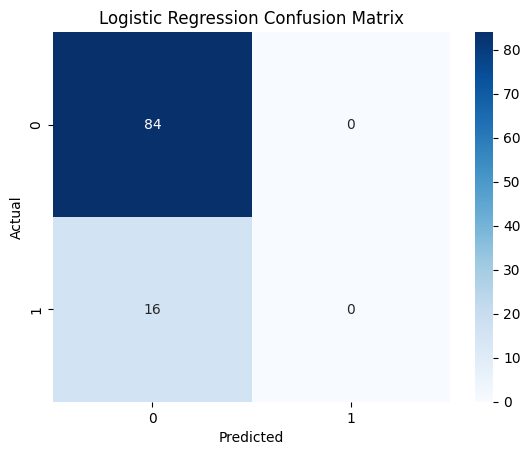


=== Random Forest Results ===
Accuracy: 0.84
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.4523809523809524


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


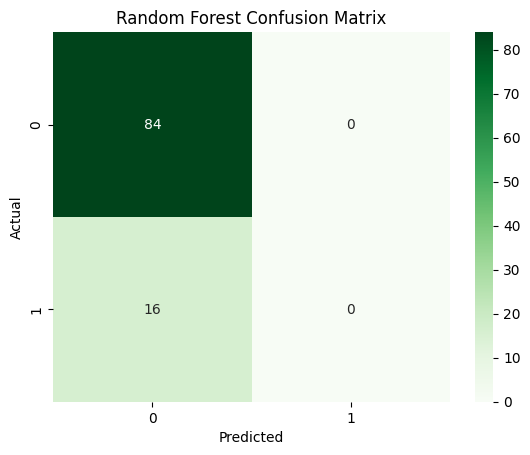

In [3]:
# ==============================================
# STEP 1: Install & Import Libraries
# ==============================================
!pip install pandas scikit-learn matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, confusion_matrix
# ==============================================
# STEP 2: Load Dataset
# ==============================================
from google.colab import files
uploaded = files.upload() # Upload "Delinquency_prediction_dataset (2).csv"
df = pd.read_csv("Delinquency_prediction_dataset.csv")
print(df.shape)
df.head()
# ==============================================
# STEP 3: Data Preprocessing
# ==============================================
# Drop ID column (not useful for prediction)
df = df.drop("Customer_ID", axis=1)
# Fill missing numeric values with median
for col in ["Income", "Credit_Score", "Loan_Balance"]:
 df[col].fillna(df[col].median(), inplace=True)
# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)
# ==============================================
# STEP 4: Train-Test Split
# ==============================================
X = df.drop("Delinquent_Account", axis=1)
y = df["Delinquent_Account"]
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42, stratify=y
)
# ==============================================
# STEP 5: Feature Scaling
# ==============================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# ==============================================
# STEP 6: Logistic Regression Model
# ==============================================
log_model = LogisticRegression(max_iter=5000, solver="lbfgs")
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)
print("=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:,1]))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# ==============================================
# STEP 7: Random Forest Model
# ==============================================
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\n=== Random Forest Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
